<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/PSI5892_perceptron_reg_log_circ_quad_1025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

<div class="alert alert-block alert-danger">
Para praticar programação, é importante que você erre, leia as mensagens de erro e tente corrigí-los.
    
Dessa forma, no Google Colab, é importante que você DESATIVE OS RECURSOS DE AUTOCOMPLETAR:

- Menu Ferramentas -> Configurações
- Na janela que é aberta:
  - Seção Editor -> Desativar "Mostrar sugestões de preenchimento de código com base no contexto"
  - Seção Assistência de IA -> Desabilitar itens

Na versão em inglês:

- Menu Tools -> Settings
- Na janela que é aberta:
  - Seção Editor -> Desativar "Show context-powered code completions"
  - Seção AI Assistance -> Desabilitar itens
</div>

# PSI5892 - Aula de Exercícios

# Perceptron de Rosenblatt e Regressão Logística 2

Um dos experimentos feitos com o perceptron de Rosenblatt consistia na classificação de caracteres. Um caractere era exposto na frente de uma matriz de sensores, que digitalizava a imagem e os elementos dessa matriz eram utilizados como entradas do perceptron, conforme mostrado na fotografia abaixo:

<img src="https://github.com/psi5892/exercicios_aula_publico/blob/main/ex_aula_perceptron_rosenblatt_e_reg_logistica_2/Rosen_2.png?raw=1" style="width: 500px; margin:auto"/>

A ideia consistia em alimentar diversos perceptrons com essas entradas, que funcionariam em paralelo, de forma independente uns dos outros. Cada um era treinado para classificar um determinado caractere, fornecendo saída igual a 1 no caso da detecção do caractere em questão ou -1, no caso da detecção de qualquer outro caractere. Assim, era possível obter uma estrutura com várias saídas, cada uma representando o reconhecimento de um determinado caractere.

Neste exercício, você vai trabalhar em uma aplicação semelhante, porém simplificada: um classificador binário usando o perceptron de Rosenblatt para classificar imagens de círculos ou quadrados.

Antes de começar a trabalhar no código, certifique-se de ter baixado o [arquivo CSV com os dados](./circles_and_squares.csv) do repositório de materiais.

Para carregar o arquivo CSV e processar os dados, você pode usar a biblioteca [Pandas](https://pandas.pydata.org/). Após a instalação da biblioteca e o download do arquivo CSV, é possível carregar os dados com os seguintes comandos:

In [28]:
import pandas as pd
data_df = pd.read_csv("circles_and_squares.csv")

Com esses comandos, você vai criar um *DataFrame* do Pandas chamado `data_df` contendo os dados do arquivo CSV. Para ver algumas linhas do *DataFrame*, você pode usar o método `.head()`:

In [29]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


É possível converter o *DataFrame* em um *array* NumPy usando o método `.to_numpy()`:

In [30]:
data = data_df.to_numpy()
data_df.shape

(1000, 401)

A matriz de dados tem 1000 linhas e 401 colunas. Cada linha se refere a um exemplo no banco de dados. As 400 primeiras colunas se referem aos elementos de uma matriz 20x20 com os dados referentes à digitalização de uma imagem de um círculo ou de um quadrado. A última coluna é um rótulo igual a -1 ou 1 indicando se a imagem se refere a um círculo ou a um quadrado.

Você pode visualizar uma imagem, usando o método `.reshape()` para reorganizar os 400 coeficientes em uma matriz 20x20 e a função `imshow()` para exibí-la. Por exemplo, para exibir a imagem referente à primeira linha da matriz:

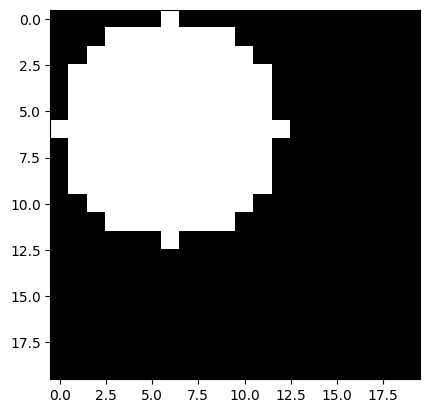

In [31]:
import matplotlib.pyplot as plt
img = data[0, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')

O rótulo referente à imagem pode ser obtido com o elemento da última coluna:

In [32]:
data[0, 400]

np.float64(-1.0)

Como você pode observar, o rótulo igual a -1 é usado para identificar os círculos. Além disso, vale notar também que a resolução de 20x20 considerada na digitalização da figura do círculo causa uma distorção considerável. No entanto, vamos utilizar essa resolução baixa para reduzir a dimensionalidade do problema e tornar o treinamento mais rápido.

A quinta linha da matriz (índice 4) representa um quadrado:

1.0


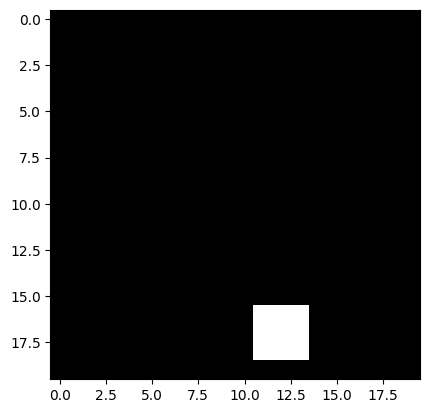

In [33]:
img = data[4, :-1].reshape((20,20))
print(data[4, -1])
plt.imshow(img, cmap='gray')

Nos exercícios, você vai utilizar as 800 primeiras linhas do banco de dados para fazer o treinamento dos modelos, ajustando os valores dos pesos de forma iterativa e as 200 linhas finais para avaliar o desempenho na classificação de círculos e quadrados. Dessa forma, você pode separar os dados em uma matriz `Xd` para o treinamento e `Xd_test` para o teste:

In [34]:
Xd = data[:800, :]
Xd_test = data[800:, :]

# Exercício 1

Implementar uma função para treinar o perceptron de Rosenblatt de forma iterativa, dados a matriz `Xd`, um passo de adaptação `eta`, o número de épocas `Ne` e o tamanho do *mini-batch* `Nb`. Após o treinamento, avalie o seu modelo com os dados dos conjuntos de treinamento e de teste, medindo a acurácia do classificador para ambos os casos. A escolha desses hiperparâmetros fica a seu critério, buscando obter um bom desempenho com os dados de teste.

## Resolução

In [35]:
import numpy as np

def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):


    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))

    # Inicializa pesos (incluindo bias) de forma aleatória
    W = np.random.uniform(-dw, dw, (Ne*Nmb+1, M + 1 ))

    # Junta bias e saída desejada (para embaralhar juntos)
    Xd = np.hstack((np.ones((Nt, 1)), x, d.reshape(-1, 1)))


    # epocas
    for k in range(Ne):
        np.random.shuffle(Xd)
        X_l = Xd[:, :-1]
        D_l = Xd[:, -1].reshape(-1, 1)

        # Mini-batches
        for l in range(Nmb):
            inicio = l * Nb
            fim = inicio + Nb

            xmb = X_l[inicio:fim, :]
            dmb = D_l[inicio:fim, :]

            m = k * Nmb + l
            v = xmb @ W[m, :].reshape(-1,1)
            y = np.heaviside(v,1)
            y [y == 0] = -1

            e = dmb - y
            grad = (eta / Nb) * (e.T @ xmb)
            W[m + 1, :] = W[m, :] + grad



    return W


In [36]:
# Funcao taxa de erro
def tx_erro(x, d, w):

  d = d.reshape(-1,1)

  # incluir 1 nos valores de X para o bias
  X = np.hstack((np.ones((x.shape[0], 1)), x))
  #print("\nDimensao X", X.shape)
  v = X @ w.reshape(-1,1)
  #print("\nDimensao v", v.shape)
  y = np.heaviside(v,1)
  y [y == 0] = -1
  #print("\nDimensao y", y.shape)
  #print("\nUltimos 10 d", d[-10:])
  #print("\nUltimos 10 y", y[-10:])
  erro = d - y
  #print("\nDimensao erro", erro.shape)
  tx_e = np.sum(np.abs(erro))/len(d)
  #tx_e = np.mean(y != d)

  return tx_e


In [89]:
#############
# Treinamento
#############

eta = 0.5
Nb = 20
Ne = 1200
dw = 0.01

# Linhas de treinamento
Nt = 800

#print("\nParametros:")
#print("\nDimensao Xd", Xd.shape)

# Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)
W = Rosenblatt_minibatch(Xd[:,:-1], Xd[:,-1], eta, Nt, Ne, Nb, dw)

Wfinal = W[-1]
Wfinal = Wfinal.reshape(1,-1)
#print("\nWfinal_treinamento =", Wfinal_treinamento )

#############
# Taxa de erro do treinamento
#############

# tx_erro(x, d, w)
tx_er_treinamento = tx_erro(Xd[:, :-1], Xd[:,-1], Wfinal)
#print(f"\nTaxa de erro de treinamento = {tx_er_treinamento:.2%}")

#############
# Acuracia do treinamento
#############
tx_ac_treinamento = 1 - tx_er_treinamento

print(f"\nAcuracia do treinamento = {tx_ac_treinamento:.2%}")


########################## ############################

#############
# Teste
#############

eta = 0.5
Nb = 20
Ne = 1200
dw = 0.01

# Linhas de teste
Nt = 200

#print("\nParametros:")
#print("\nDimensao Xd_test", Xd_test.shape)

# Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)
W_t = Rosenblatt_minibatch(Xd_test[:,:-1], Xd_test[:,-1], eta, Nt, Ne, Nb, dw)

Wfinal_t = W_t[-1]
Wfinal_t = Wfinal_t.reshape(1,-1)
#print("\nWfinal_treinamento =", Wfinal_treinamento )

#############
# Taxa de erro do teste
#############

# tx_erro(x, d, w)
tx_er_teste = tx_erro(Xd_test[:, :-1], Xd_test[:,-1], Wfinal_t)
#print(f"\nTaxa de erro de treinamento = {tx_er_treinamento:.2%}")

#############
# Acuracia do teste
#############
tx_ac_teste = 1 - tx_er_teste

print(f"\nAcuracia do teste = {tx_ac_teste:.2%}")





Acuracia do treinamento = 100.00%

Acuracia do teste = 100.00%


# Exercício 2

Repita o exercício 1, mas em vez de usar um modelo baseado no Perceptron de Rosenblatt, utilize um modelo baseado na regressão logística. Assim como no exercício anterior, implemente o algoritmo para treinar o modelo de forma iterativa, sem usar bibliotecas auxiliares com exceção do NumPy. Considere as seguintes funções custo:
- Erro quadrático médio
- Entropia cruzada

## Resolução

In [72]:
# Funcao regressao logistica
def regressao_logistica(x, d, eta, Nt, Ne, Nb, dw, custo='ent_cruzada'):

  d = d.reshape(-1,1)

  # converte d para o intervalo [0 1]
  d = (d + 1) / 2

  M = x.shape[1]
  #X = np.hstack((np.ones((Nt, 1)), x))

  Nmb = int(Nt/Nb)

  #W = np.random.randn(M) * 0.01
  #W = np.zeros((M + 1,1))
  # inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
  W = np.random.uniform(-dw, dw, (Ne*Nmb + 1, M+1))
  X = np.hstack((np.ones((Nt, 1)), x, d))

  # epocas\n",
  for k in range(Ne):
            # embaralha dados
            np.random.shuffle(X)

            # x e d organizados em X(l) e d(l)
            X_l = X[:, :-1]
            D_l = X[:, -1].reshape(-1, 1)

            # mini-batches\n",
            for l in range(Nmb):

              # percorre os dados de Nb em Nb, Nmb vezes
              inicio = l * Nb
              fim = inicio + Nb

              # coloca Nbx(Mb+1) elementos em X e Nbx1 em d
              xmb = X_l[inicio:fim, :]
              dmb = D_l[inicio:fim, :]


              m = k * Nmb + l

              # todas as entradas(X_l) do mimi-batch multiplicadas pelos coeficientes do mini-batch
              # v = [Nb x (M+1)] x [M+1 x 1] = [Nb x 1]
              #print("\nDimensao xmb", xmb.shape)
              #print("\nDimensao W[m, :]", W[m, :].shape)
              v = xmb @ W[m, :].reshape(-1,1)

              y = sigmoid(v)
              y = y.reshape(-1,1)

              # erro no mini-batch
              e = dmb - y
              #print("\nDimensao e", e.shape)

              if custo == 'mse':

                grad = (eta / Nb) * (xmb.T @ (e * y * (1 - y)))    # HA
              else:

                grad = (eta / Nb) * (xmb.T @ e)   # HA

              #W[[m + 1], :] =
              W[m + 1, :] = W[m, :] + grad.reshape(1,-1)

  return W



# Funcao sigmoidal
def sigmoid(v):
    return 1 / (1 + np.exp(-v))




In [70]:
def tx_ac(x, d, w1):

  d = d.reshape(-1,1)
  w1 = w1.reshape(-1,1)

  # incluir 1 nos valores de X para o bias
  X = np.hstack((np.ones((x.shape[0], 1)), x))
  #print("\nDimensao X", X.shape)
  #print("\nDimensao w1", w1.shape)
  v = X @ w1
  #print("\nDimensao v", v.shape)
  y = sigmoid(v)
  # converter em -1 ou 1 a saida y
  y = np.where(y >= 0.5, 1, -1)
  erro = d - y

  print(f"\nUltimos 10 valores de d \n{d[-10:].T} \ne de y \n{y[-10:].T}")

  tx_ac = np.mean(y == d)
  return tx_ac

In [77]:
#############
# Treinamento
#############

eta = 0.5
Nb = 80
Ne = 8000
dw = 0.01

# Linhas de treinamento
Nt = 800


#print("\nDimensao Xd", Xd.shape)


print("\n######### Treinamento")
print("\n######### Regressao Logistica")
print("\n######### Custo : MSE")


# regressao_logistica(x, d, eta, Nt, Ne, custo='ent_cruzada')
# W = Rosenblatt_minibatch(Xd[:,:-1], Xd[:,-1], eta, Nt, Ne, Nb, dw) usado no treinamento no modo Rosenblatt
#W_reg_log = regressao_logistica(Xd[:,:-1], Xd[:,-1], eta, Nt, Ne, 'MSE')
# regressao_logistica(x, d, eta, Nt, Ne, Nb, dw, custo='ent_cruzada'):
W_reg_log = regressao_logistica(Xd[:,:-1], Xd[:,-1], eta, Nt, Ne, Nb, dw, 'mse')

Wfinal_reg_log = W_reg_log[-1].reshape(-1,1)
Wfinal_reg_log = Wfinal_reg_log
print("\nWfinal_reg_log =", Wfinal_reg_log.shape )

#############
# Acuracia do treinamento
#############

# tx_erro(x, d, w)
tx_ac_treinamento = tx_ac(Xd[:, :-1], Xd[:,-1].reshape(-1,1), Wfinal_reg_log.reshape(1,-1))
#print(f"\nTaxa de erro de treinamento = {tx_er_treinamento:.2%}")

print(f"\nAcuracia do treinamento com custo MSE = {tx_ac_treinamento:.2%}")

print("\n######### Treinamento")
print("\n######### Regressao Logistica")
print("\n######### Custo : Entropia Cruzada")

#######
W_reg_log2 = regressao_logistica(Xd[:,:-1], Xd[:,-1], eta, Nt, Ne, Nb, dw, 'ent_cruzada')
Wfinal_reg_log2 = W_reg_log2[-1]
Wfinal_reg_log2 = Wfinal_reg_log2

tx_ac_treinamento2 = tx_ac(Xd[:, :-1], Xd[:,-1].reshape(-1,1), Wfinal_reg_log2.reshape(1,-1))
#print(f"\nTaxa de erro de treinamento = {tx_er_treinamento:.2%}")

print(f"\nAcuracia do treinamento com custo Entropia Cruzada = {tx_ac_treinamento2:.2%}")


######### Treinamento

######### Regressao Logistica

######### Custo : MSE

Wfinal_reg_log = (401, 1)

Ultimos 10 valores de d 
[[ 1.  1.  1. -1. -1.  1. -1.  1.  1. -1.]] 
e de y 
[[ 1  1  1 -1  1  1 -1  1  1 -1]]

Acuracia do treinamento com custo MSE = 92.12%

######### Treinamento

######### Regressao Logistica

######### Custo : Entropia Cruzada

Ultimos 10 valores de d 
[[ 1.  1.  1. -1. -1.  1. -1.  1.  1. -1.]] 
e de y 
[[-1  1  1 -1 -1  1 -1  1  1 -1]]

Acuracia do treinamento com custo Entropia Cruzada = 93.88%
